In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/team_project/non_alcoh_beers_20_homeplus.csv")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품명     9617 non-null   object 
 1   가격      9617 non-null   object 
 2   별점      9617 non-null   float64
 3   리뷰내용    9617 non-null   object 
 4   리뷰날짜    9617 non-null   object 
dtypes: float64(1), object(4)
memory usage: 375.8+ KB


In [24]:
data.head(2)

,제품명,가격,별점,리뷰내용,리뷰날짜
0,논알콜 코젤다크(무알콜맥주) 500ML,"2,200",4.7,편하게 잘 구매했어요,2023.11.13
1,논알콜 코젤다크(무알콜맥주) 500ML,"2,200",4.7,논알코올인데 맛있대요.,2023.11.13


In [3]:
data['가격'] = data['가격'].str.replace(',','').astype(int)

In [159]:
data['별점'] = data['별점'].astype(float)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품명     9617 non-null   object 
 1   가격      9617 non-null   int32  
 2   별점      9617 non-null   float64
 3   리뷰내용    9617 non-null   object 
 4   리뷰날짜    9617 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 338.2+ KB


In [108]:
data['제품명'].unique()

array(['논알콜 코젤다크(무알콜맥주) 500ML', '오비 논알콜 카스제로(무알콜맥주) 355ML*6',
       '논알콜 비트버거 라들러 레몬캔(무알콜맥주) 500ML', '무알콜 클라우드 클리어제로(무알콜맥주) 350ML',
       '오비 논알콜 카스 제로(무알콜맥주) 355ML', '논알콜 칭따오 캔(무알콜맥주) 330ML',
       '클라우드 클리어제로(무알콜맥주) 350ML*6', '오비 무알콜 카스 제로(무알콜맥주) 500ML*4입',
       '하이네켄 넌알콜릭 캔 (무알콜맥주) 330ML', '논알콜 에페스 제로 클래식캔(무알콜맥주)  500ML',
       '논알콜 클라우스탈러(무알콜맥주) 330ML', '하이네켄 논알콜 캔(무알콜맥주) 500ML',
       '논알콜 클라우스탈러 병(무알콜맥주) 330ML', '논 알콜 칭따오 캔(무알콜맥주) 500ML',
       '오비 버드와이저 제로(무알콜맥주) 500ML', '오비 호가든 제로(무알콜맥주) 500ML',
       '오비 무알콜 카스 제로(무알콜맥주) 500ML', '진로 무알콜 하이트제로 350ML*6',
       '진로 무알콜 하이트제로 350ML', '논알콜 발왕산 막걸리 제로(무알콜) 350ML'], dtype=object)

* 홈플러스 제품구성 상 동일상품인데 500ML와 350ML, 6묶음 등으로 이루어진 상품들이 있어서 총 종류는 12종
* 20종을 12종으로 이름을 분류하자.

In [135]:
data.loc[data['제품명'].str.contains('355ML')]

,제품명,가격,별점,리뷰내용,리뷰날짜
691,오비 논알콜 카스제로(무알콜맥주) 355ML*6,4990,4.8,재구매하곤 합니다.,2023.11.12
692,오비 논알콜 카스제로(무알콜맥주) 355ML*6,4990,4.8,저렴하게 잘 샀습니다,2023.11.12
693,오비 논알콜 카스제로(무알콜맥주) 355ML*6,4990,4.8,무알콜음료 세일 자주 했으면 좋겠어요.,2023.11.11
694,오비 논알콜 카스제로(무알콜맥주) 355ML*6,4990,4.8,무알콜로는 카스가 맛이 젤 괞은것 같아요^^ \n알콜이 있는것으론 카프리가 젤 부...,2023.11.11
695,오비 논알콜 카스제로(무알콜맥주) 355ML*6,4990,4.8,애주가인데\n술을 못먹는상황이라 무알콜 맥주 한캔씩 먹는데\n맛이 똑같네요 굿굿~,2023.11.10
...,...,...,...,...,...
9082,오비 논알콜 카스 제로(무알콜맥주) 355ML,890,4.7,배달해주셔서감사합니다,2021.08.14
9083,오비 논알콜 카스 제로(무알콜맥주) 355ML,890,4.7,배달해주셔서감사합니다,2021.08.14
9084,오비 논알콜 카스 제로(무알콜맥주) 355ML,890,4.7,배달해주셔서감사합니다,2021.08.14
9085,오비 논알콜 카스 제로(무알콜맥주) 355ML,890,4.7,배달해주셔서감사합니다,2021.08.14


In [110]:
data.head()

,제품명,가격,별점,리뷰내용,리뷰날짜
0,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,편하게 잘 구매했어요,2023.11.13
1,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,논알코올인데 맛있대요.,2023.11.13
2,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,알코올 섭취하면 안되는 제에겐 필수죠,2023.11.12
3,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,행사할때 구매해서 좋아요,2023.11.11
4,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,좋아하는 맥준데 논알콜이 있는줄 몰랐는데 괜찮네요 좋아요,2023.11.11


SyntaxError: invalid syntax (3665961139.py, line 1)

In [143]:
change_price = lambda x: 890 if x["제품명"] == '오비 논알콜 카스제로(무알콜맥주) 355ML*6' and x["가격"] == 4990 else x["가격"]

In [151]:
print(change_price)

<function <lambda> at 0x0000024BAABC3430>


In [160]:
data['가격'] = data.apply(lambda x: 890 if x["제품명"] == '오비 논알콜 카스제로(무알콜맥주) 355ML*6' and x["가격"] == 4990 else x["가격"], axis=1)

In [162]:
data.loc[data['제품명'] == '오비 논알콜 카스제로(무알콜맥주) 355ML*6']

,제품명,가격,별점,리뷰내용,리뷰날짜
691,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,재구매하곤 합니다.,2023.11.12
692,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,저렴하게 잘 샀습니다,2023.11.12
693,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,무알콜음료 세일 자주 했으면 좋겠어요.,2023.11.11
694,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,무알콜로는 카스가 맛이 젤 괞은것 같아요^^ \n알콜이 있는것으론 카프리가 젤 부...,2023.11.11
695,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,애주가인데\n술을 못먹는상황이라 무알콜 맥주 한캔씩 먹는데\n맛이 똑같네요 굿굿~,2023.11.10
...,...,...,...,...,...
8902,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,논알콘이라 맥주생각날때 먹으려고 사요,2022.01.25
8903,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,좋아요 좋아요 좋아요,2022.01.24
8904,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,하이트가 완전 무알콜,2022.01.23
8905,오비 논알콜 카스제로(무알콜맥주) 355ML*6,890,4.8,모르고 먹으면 보통 맥주인줄...무알콜맥주중에 카스제로가 제일 맥주맛에 가까운거 같아요,2022.01.23


In [ ]:
data['가격'] = data.apply(lambda x: 1190 if x["제품명"] == '오비 무알콜 카스 제로(무알콜맥주) 500ML*4입' and x["가격"] == 4990 else x["가격"], axis=1)

In [164]:
data['가격'] = data.apply(lambda x: 1190 if x["제품명"] == '오비 무알콜 카스 제로(무알콜맥주) 500ML*4입' and x["가격"] ==4760 \
           else x["가격"], axis=1)

In [165]:
data.loc[data['제품명'] == '오비 무알콜 카스 제로(무알콜맥주) 500ML*4입']

,제품명,가격,별점,리뷰내용,리뷰날짜
3894,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,맥주가 생갹날때..맛은 별로입니다,2023.11.02
3895,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,무알콜 맛나요 덕분에 쟁여놓아요,2023.10.28
3896,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,든든하네요*ㅋ 육퇴 후 무알콜맥주타임 좋아요,2023.10.26
3897,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,맛은 떨어지지만 무알콜이라 좋아요,2023.10.25
3898,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,먹다보니 진짜맥주갘아요*,2023.10.24
...,...,...,...,...,...
9181,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,The only thing I can,2022.10.03
9182,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,저렴하게 구매해서 좋아요,2022.10.02
9183,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,저렴하게 구매해서 좋아요,2022.09.30
9184,오비 무알콜 카스 제로(무알콜맥주) 500ML*4입,1190,4.8,맛있어서 재구매해요,2022.09.26


In [166]:
data['가격'] = data.apply(lambda x: 990 if x["제품명"] == '진로 무알콜 하이트제로 350ML*6' and x["가격"] == 4990 \
          else x["가격"], axis=1)

In [168]:
data['가격'] = data.apply(lambda x: 1190 if x["제품명"] == '클라우드 클리어제로(무알콜맥주) 350ML*6' and \
                       x["가격"] == 7140 else x['가격'], axis=1)

In [169]:
data.groupby('제품명')['가격'].value_counts(sort=False)

제품명                            가격  
논 알콜 칭따오 캔(무알콜맥주) 500ML        2200     188
논알콜 발왕산 막걸리 제로(무알콜) 350ML      1190     547
논알콜 비트버거 라들러 레몬캔(무알콜맥주) 500ML  2490     165
논알콜 에페스 제로 클래식캔(무알콜맥주)  500ML  1900     206
논알콜 칭따오 캔(무알콜맥주) 330ML         1490     472
논알콜 코젤다크(무알콜맥주) 500ML          2200     766
논알콜 클라우스탈러 병(무알콜맥주) 330ML      1690     256
논알콜 클라우스탈러(무알콜맥주) 330ML        1590     564
무알콜 클라우드 클리어제로(무알콜맥주) 350ML    1190     915
오비 논알콜 카스 제로(무알콜맥주) 355ML      890      797
오비 논알콜 카스제로(무알콜맥주) 355ML*6     890      734
오비 무알콜 카스 제로(무알콜맥주) 500ML      1190     175
오비 무알콜 카스 제로(무알콜맥주) 500ML*4입   1190     176
오비 버드와이저 제로(무알콜맥주) 500ML       2600      96
오비 호가든 제로(무알콜맥주) 500ML         2600     105
진로 무알콜 하이트제로 350ML             990      896
진로 무알콜 하이트제로 350ML*6           990     1608
클라우드 클리어제로(무알콜맥주) 350ML*6      1190     444
하이네켄 넌알콜릭 캔 (무알콜맥주) 330ML      1760     164
하이네켄 논알콜 캔(무알콜맥주) 500ML        2600     343
Name: count, dtype: int64

In [174]:
data['제품명'] = data['제품명'].apply(lambda x : '오비 논알콜 카스제로(무알콜맥주) 355ML' if x == '오비 논알콜 카스제로(무알콜맥주) 355ML*6'\
                 else x)

In [175]:
data['제품명'] = data['제품명'].apply(lambda x: '오비 무알콜 카스 제로(무알콜맥주) 500ML' \
                               if x == '오비 무알콜 카스 제로(무알콜맥주) 500ML*4입' else x)

In [177]:
data['제품명'] = data['제품명'].apply(lambda x: '무알콜 클라우드 클리어제로(무알콜맥주) 350ML' \
                               if x == '클라우드 클리어제로(무알콜맥주) 350ML*6' else x)

In [179]:
data['제품명'] = data['제품명'].apply(lambda x: '진로 무알콜 하이트제로 350ML' \
                               if x == '진로 무알콜 하이트제로 350ML*6' else x)

In [180]:
data.groupby('제품명')['가격'].value_counts(sort=False)

제품명                            가격  
논 알콜 칭따오 캔(무알콜맥주) 500ML        2200     188
논알콜 발왕산 막걸리 제로(무알콜) 350ML      1190     547
논알콜 비트버거 라들러 레몬캔(무알콜맥주) 500ML  2490     165
논알콜 에페스 제로 클래식캔(무알콜맥주)  500ML  1900     206
논알콜 칭따오 캔(무알콜맥주) 330ML         1490     472
논알콜 코젤다크(무알콜맥주) 500ML          2200     766
논알콜 클라우스탈러 병(무알콜맥주) 330ML      1690     256
논알콜 클라우스탈러(무알콜맥주) 330ML        1590     564
무알콜 클라우드 클리어제로(무알콜맥주) 350ML    1190    1359
오비 논알콜 카스 제로(무알콜맥주) 355ML      890      797
오비 논알콜 카스제로(무알콜맥주) 355ML       890      734
오비 무알콜 카스 제로(무알콜맥주) 500ML      1190     351
오비 버드와이저 제로(무알콜맥주) 500ML       2600      96
오비 호가든 제로(무알콜맥주) 500ML         2600     105
진로 무알콜 하이트제로 350ML             990     2504
하이네켄 넌알콜릭 캔 (무알콜맥주) 330ML      1760     164
하이네켄 논알콜 캔(무알콜맥주) 500ML        2600     343
Name: count, dtype: int64

In [181]:
data['제품명'].nunique()

17

* 350ml와 500ml를 나누기로 결정 총 70종류

<Axes: xlabel='가격'>

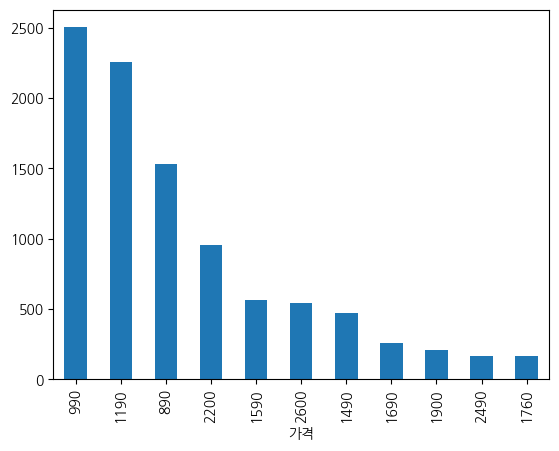

In [182]:
data['가격'].value_counts().plot(kind='bar')

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품명     9617 non-null   object 
 1   가격      9617 non-null   int64  
 2   별점      9617 non-null   float64
 3   리뷰내용    9617 non-null   object 
 4   리뷰날짜    9617 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 375.8+ KB


In [ ]:
beer_final2.to_csv("./data/non_alcoh_beers_20_homeplus.csv", index=False)

In [ ]:
data.to_csv("./data/team_project/non_alcoh_beers_20_final.csv", index=False)

In [4]:
test_data = pd.read_csv("./data/team_project/non_alcoh_beers_20_ubunto.csv")

In [31]:
test_data.loc[test_data['리뷰내용'].str.contains("밍밍")]

,제품명,가격,별점,리뷰내용,리뷰날짜,리뷰내용2
195,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,가격 윈풀원 행사해서 너무 만족스러위요 코젤 논알콜 정말 맛있어요 논알콜이지만 밍밍...,2023.07.10,"['가격', '윈', '풀', '원', '행사', '만족', '위요', '알콜', ..."
255,논알콜 코젤다크(무알콜맥주) 500ML,2200,4.7,완전히 알콜이 없는 건 아닌 것 같고\n맛은 밍밍하긴 해요,2023.05.22,"['알콜', '건', '것', '맛']"
859,오비 논알콜 카스제로(무알콜맥주) 355ML,890,4.8,더운 날씨 해갈용으로 구입했어요\n탄산수는 밍밍하고 탄산음료는 너무 단 것 같을 때...,2023.05.15,"['날씨', '갈용', '구입', '탄산수', '탄산', '음료', '것', '때']"
1616,무알콜 클라우드 클리어제로(무알콜맥주) 350ML,1190,4.7,밍밍...합니다.. 묘하네요 밍밍해..,2023.02.28,['묘하']
1617,무알콜 클라우드 클리어제로(무알콜맥주) 350ML,1190,4.7,클라우드 클리어제로.. 좀 밍밍하네요.,2023.02.18,"['클라우드', '클리', '어제']"
2060,무알콜 클라우드 클리어제로(무알콜맥주) 350ML,1190,4.7,알콜을 자제해야 하는 상황이라 주문해봤는데 아...밍밍하네요 ㅎ,2021.06.16,"['알콜', '자제', '상황', '주문']"
3693,무알콜 클라우드 클리어제로(무알콜맥주) 350ML,1190,4.7,종종 구입해요 가볍게 마시기 좋지만 그냥 맥주보단 밍밍해요,2022.10.05,"['구입', '맥주']"
3742,무알콜 클라우드 클리어제로(무알콜맥주) 350ML,1190,4.7,밍밍해여. 다른 무알콜보다 맛없음,2022.08.12,['알콜']
4965,하이네켄 논알콜 캔(무알콜맥주) 500ML,2600,4.7,무난하고 맥주같다가 끝에가 갑자기 확 밍밍..그래도 나쁘지않아요!,2023.02.28,"['맥주', '끝']"
7393,진로 무알콜 하이트제로 350ML,990,4.9,"주위에서 평이 괜찮아서 구입했는데, 맛이 너무 없습니다. 밍밍하고 거품도 아주 적어요",2014.09.02,"['주위', '평', '구입', '맛', '거품']"
